In [9]:
import pandas as pd
import sqlite3
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
#create a sqlite file
db_name = "us_food_desert.sqlite"

conn = sqlite3.connect(db_name)
cursor = conn.cursor()

In [11]:
#read our cleaned data csv 
df = pd.read_csv("FoodAccessResearchDataCleanCSV_Updated.csv")

In [12]:
df.to_sql("food_deserts", conn, if_exists="replace", index=False)

3101

In [13]:
#query to Identify Counties with High Food Access Issues in Rural Areas
query =  "SELECT County, State, LowAccess_HalfUrban_10MRural, TotalPopulation,  (LowAccess_HalfUrban_10MRural * 100.0 / TotalPopulation) AS Rural_LowAccess_Percentage FROM food_deserts WHERE LowAccess_HalfUrban_10MRural > 5000  -- Change threshold as needed  ORDER BY Rural_LowAccess_Percentage DESC  LIMIT 10;"

result = pd.read_sql(query, conn)
print(result)

                 County    State  LowAccess_HalfUrban_10MRural  \
0        Autauga County  Alabama                       14721.0   
1        Baldwin County  Alabama                       35823.0   
2        Calhoun County  Alabama                       34680.0   
3       Chambers County  Alabama                        5426.0   
4         Clarke County  Alabama                        6050.0   
...                 ...      ...                           ...   
1355     Laramie County  Wyoming                       33724.0   
1356     Natrona County  Wyoming                       21363.0   
1357        Park County  Wyoming                        8724.0   
1358    Sheridan County  Wyoming                        8893.0   
1359  Sweetwater County  Wyoming                        8365.0   

      TotalPopulation  Rural_LowAccess_Percentage  
0               54571                   26.975866  
1              182265                   19.654349  
2              118572                   29.248052  

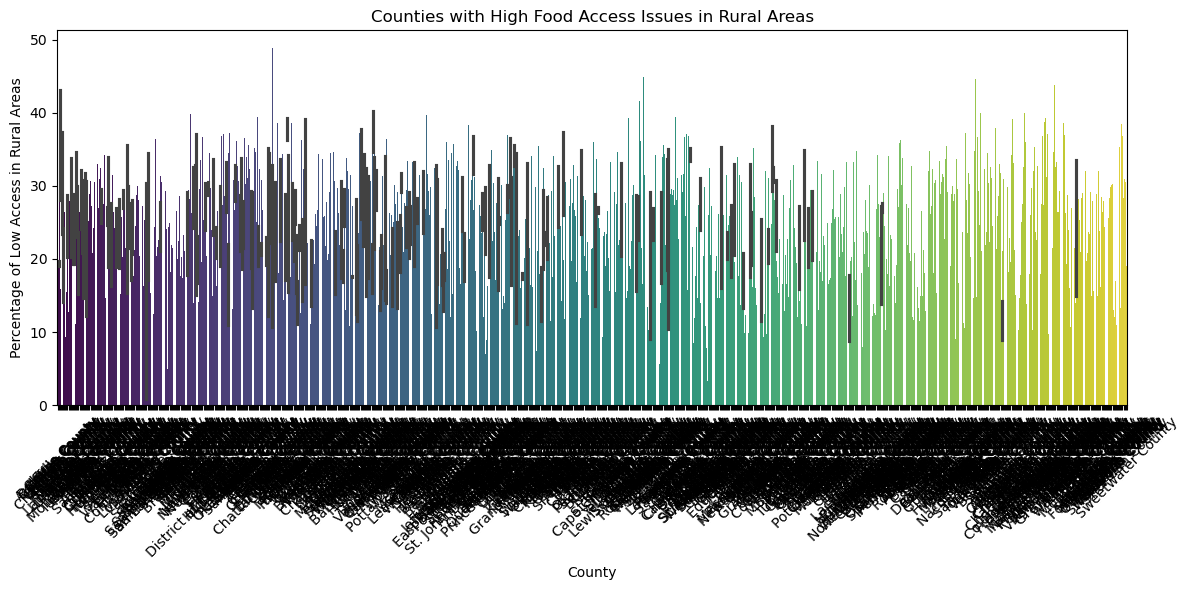

In [14]:
#Rural_LowAccess_Percentage for the top counties:

plt.figure(figsize=(12, 6))
#sns.barplot(data=result, x='County', y='LowAccess_Percentage', palette='viridis')
sns.barplot(data=result, x='County', y='Rural_LowAccess_Percentage', hue='County', palette='viridis', legend=False)
plt.title('Counties with High Food Access Issues in Rural Areas')
plt.xlabel('County')
plt.ylabel('Percentage of Low Access in Rural Areas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
print(result.head())

            County    State  LowAccess_HalfUrban_10MRural  TotalPopulation  \
0   Autauga County  Alabama                       14721.0            54571   
1   Baldwin County  Alabama                       35823.0           182265   
2   Calhoun County  Alabama                       34680.0           118572   
3  Chambers County  Alabama                        5426.0            34215   
4    Clarke County  Alabama                        6050.0            25833   

   Rural_LowAccess_Percentage  
0                   26.975866  
1                   19.654349  
2                   29.248052  
3                   15.858542  
4                   23.419657  
